# Regresión Lineal

En este Notebook podrás encontrar una introducción teórica básica a los modelos de regresión lineal simple y múltiple, y como llevarlos a cabo mediante Python de diferentes formas:

- Método manual
- statsmodel
- scikit-learn

La regresión lineal es un método supervisado de machine learning que permite predecir el valor de una variable cuantitativa en base a otra variables o datos.

## 1. Introducción teórica a la regresión lineal simple

### 1.1. Ecuaciones y coeficientes

En estadística la regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $y$, y la variable dependiente $x$. Este modelo asume que existe una relación lineal entre la variable $x$ y la varible $y$, más un término denominado error aleatorio que sigue una distribución normal de media cero, $\epsilon$ ~ $N(0,\sigma)$. Matemáticamente se puede expresar como:

\begin{align}
y = f(x) + \epsilon = \alpha + \beta  x + \epsilon
\end{align}

Para saber si dos variables tienen una relación de dependencia, es común analizar la correlación de éstas. La correlación $r$ de Pearson, es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de otras medidas como la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables. El valor de este índice oscila entre el intervalo [-1, 1], siendo los extremos donde se encuentra la correlación máxima. La fórmula es la siguiente:

\begin{equation*}
r = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2\sum(y_i-\bar{y})^2}}
\end{equation*}


Una vez se ha analizado la correlación de dos variables, el siguiente paso es obtener el modelo de predicción de de $y$ en base a $x$. En la primera ecuación encontramos que existen dos parámetros desconocidos, $\alpha$ (intercepto u ordenada en el origen) y $\beta$ (pendiente), que será necesario estimar. Una vez utilicemos nuestro data set de entrenamiento para obtener el valor de estos coeficientes, podremos predecir un valor $\hat{y}$ en base a la variable $x$.

\begin{equation*}
\hat{y} = \hat{f}(x) = \hat{\alpha} + \hat{\beta} x
\end{equation*}

Estos coeficientes se pueden obtener de forma analítica mediante el método de los mínimos cuadrados, o de forma iterativa mediante el uso del algoritmo del gradiente descendente. En estos ejercicios, siempre se trabajará con el primero de ellos, el cual trata de minimizar la suma de los cuadrados de los residuos $e_i$ para todos y cada unos de los puntos del dataset, o dicho de otro modo, las diferencias entre el valor real de $y_i$ y el valor de la predicción $\hat{y}_i$.

\begin{equation*}
MSE = \frac{1}{n} \sum e_i^2 = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
\end{equation*}

Las fórmulas para estimar estos coeficientes derivadas del método anterior son las siguientes:

\begin{equation*}
\hat{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}\qquad
\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}
\end{equation*}

### 1.2. Precisión de los coeficientes

A la hora de realizar una regresión de este tipo y con el objeto de simplificar el modelo, se asume que la relación entres las variables es puramente lineal, y se dejan fuera del modelo algunas otras variables como el término del error aleatorio $\epsilon$ u otras columnas del dataset. Por tanto, es claro que aunque nuestros coeficientes estimados $\hat{\alpha}$ y $\hat{\beta}$ serán similares los coeficientes reales $\alpha$ y $\beta$, no serán exactamente iguales.

Para obtener una estimación del grado de precisión de los parámetros $\hat{\alpha}$ y $\hat{\beta}$ frente a los valores reales, se puede utilizar la fórmula del error estándar (SE - Standard Error):

\begin{equation*}
SE(\hat{\alpha})^2 = \sigma^2 \Bigl(\frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2} \Bigr)
\end{equation*}

\begin{equation*}
SE(\hat{\beta})^2 = \frac{\sigma^2}{\sum (x_i - \bar{x})^2}
\end{equation*}

Donde $\sigma^2$ es la varianza del error aleatorio $\epsilon$. De forma general este dato suele ser desconocido, pero se puede obtener una estimación a partir de la fórmula del error residual estándar:

\begin{equation*}
RSE = \sigma = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum (y_i - \hat{y})^2}{n-2}}
\end{equation*}

Estos erróres estándar pueden ser utilizados para calcular intervalos de confianza. Un intervalo de confianza del 95% nos indica que existe una probabilidad del 95%, de que el coeficiente real desconocido esté contenido en este rango. Para la regresión lineal, el intervalo de confianza del 95% para los dos coeficiente se obtiene mediante las siguientes fórmulas:

\begin{equation*}
\Bigl( \hat{\alpha} - 1.96·SE(\hat{\alpha}),\ \hat{\alpha} + 1.96·SE(\hat{\alpha})  \Bigr)
\end{equation*}

\begin{equation*}
\Bigl( \hat{\beta} - 1.96·SE(\hat{\beta}),\ \hat{\beta} + 1.96·SE(\hat{\beta})  \Bigr)
\end{equation*}

> ** En realidad, el coeficiente 1.96 de la fórmula anterior tiende a este valor cuando el número de grados de libertad (n) aumenta y el porcentaje de inclusión en el intervalo es de un 95%. Si se quiere ser preciso en base a n, debería calcularse como el valor que contuviera el 97,5% de una distribución t-student con n-2 grados de libertad.*

> *Utilizamos el t estadístico ya que al trabajar con muestras de la población total, no tenemos datos como la desviación estándar.*

Los errores estándar también pueden ser utilizados para llevar a cabo contrástes de hipótesis en los coeficientes. El contráste de hipótesis más común es contrastar si existe relación entre X e Y.

- Hipótesis nula $H_0$: No existe relación entre X e Y
- Hipótesis alternativa $H_\alpha$: Existe una relación entre X e Y

Matemáticamente:

\begin{equation*}
H_0 : \beta_1 = 0\\
H_\alpha : \beta_1 \neq 0
\end{equation*}

Para ello calculamos un t-estadístico, que nos indica el número de desviaciones estándar que está $\hat{\beta}$ del valor 0.

\begin{equation*}
t = \frac{\hat{\beta} - 0}{SE(\hat{\beta})}
\end{equation*}

A partir de este valor, podemos obtener el p-valor, que es la probabilidad de que un número sea mayor o igual a $t$. Un p-valor pequeño nos indica una relación entre X e Y, por lo que se podría rechazar la hipótesis nula.

Valores típicos del p-valor para rechazar la hipótesis nula son los relativos al 1% y 5%. Cuando la n = 30, debemos fijarnos que el t-estadística sea de 2 a 2,75.

### 1.3. Precisión del modelo

Una vez ha sido rechazada la hipótesis nula, es natural querer cuantificar como se adapta nuestro modelo a los datos. La calidad del ajuste de una regresión linea, se basa principalmente en dos valores, el $RSE$ y el $R^2$.

El $RSE$ es una estimación de la desviación estándar de $\epsilon$, o dicho de otro modo, es la cantidad media que se desviará la predicción de la línea de regresión verdadera. El $RSE$ es considerado una medida que indica la falta de adecuación del modelo a los datos. Su ecuación es:

\begin{equation*}
RSE = \sigma = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum (y_i - \hat{y})^2}{n-2}}
\end{equation*}

El $RSE$ es una medida de la discordancia del modelo a los datos, pero dado que es expresado en las unidades de la variables dependiente, no siempre es claro que valor de RSE es aceptable y cual no. El $R^2$ es una alternativa al indicador anterior, es el cuadrado del coeficiente de correlacion (Pearson). Este estadístico arroja un valor entre 0 y 1, y es independiente de la escala de Y. Para obtener este valor se utiliza la siguiente fórmula:

\begin{equation*}
R^2 = \frac{\sum(y_i - \bar{y})^2-\sum(y_i - \hat{y})^2}{\sum(y_i - \bar{y})^2} = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}
\end{equation*}

## 2. Introducción a la regresión lineal múltiple

### 2.1. Ecuaciones y coeficientes

Existen modelos en los que a veces no es suficiente el uso de una variable independiente $x$ para predecir una variable independiente $y$, es en estos casos donde entra en juego la regresión lineal múltiple, donde se tienen en cuenta un número $p$ de variables.

\begin{align}
y = f(x) + \epsilon = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_p x_p + \epsilon
\end{align}

Al igual que en el caso de la regresión lineal, estos coeficiente son desconocidos y tendrán que ser estimados para poder definir el modelo de predicción de la variable $\hat{y}$.

\begin{align}
\hat{y} = \hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1  x_1 + \hat{\beta}_2  x_2 + ... + \hat{\beta}_p x_p
\end{align}

Para estimar estos coeficientes se utiliza el método de los mínimos cuadrados, el cual trata de reducir para cada puntos el residuo, i.e., reducir la suma de los cuadrados de los residuos $RSS$. Dado que en la regresión lineal múltiple existen más variables, será necesario emplear métodos matriciales para hallar analíticamente los coeficientes.

\begin{align}
Y = X\beta + \epsilon\qquad\rightarrow\qquad
\begin{bmatrix}y_1\\y_2\\...\\y_n\end{bmatrix} =
\begin{bmatrix}1&x_{11}&x_{12}&...&x_{1p}\\
1&x_{21}&x_{22}&...&x_{2p}\\
...&...&...&...&...\\
1&x_{n1}&x_{n1}&...&x_{np}\end{bmatrix}\
\begin{bmatrix}\beta_o\\\beta_1\\\beta_2\\...\\\beta_p\end{bmatrix} +
\begin{bmatrix}\epsilon_1\\\epsilon_2\\...\\\epsilon_n\end{bmatrix}
\end{align}

\begin{align}
\beta = (X^TX)^{-1}X^TY
\end{align}

Cuando tenemos datasets grandes, $n·p>10^6$, puede ser conveniente empezar a usar el algoritmo del gradiente descendiente, ya que este método puede ralentizar bastante el script.

### 2.2. Precisón de los coeficientes

### 2.3. Precisión del modelo

\begin{equation*}
RSE = \sigma = \sqrt{\frac{RSS}{n-p-1}} = \sqrt{\frac{\sum (y_i - \hat{y})^2}{n-p-1}}
\end{equation*}

## 3. Regresión lineal - Manual

En este apartado pondremos en práctica todas las funciones vistas en los puntos anteriores. Python tiene un montón de librerías que permiten realizar todas estas operaciones mediante funciones ya definidas, pero en este primer punto las haremos de forma tradicional.

In [18]:
## Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Este comando permite visualizar las gráficas en la celda output del código
%matplotlib inline

Para estos ejercicios vamos a utilizar un fichero muy simple, el cual contiene los datos de ventas de 200 mercados en función de la cantidad de dinero invertida en cada medio publicitario.

Este fichero está formado por 200 registros y 4 columnas:

- TV
- Radio
- Newspaper
- Sales

In [19]:
## Cargamos el fichero de trabajo
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/ads/advertising.csv"
fullpath = mainpath + filename

data_ads = pd.read_csv(fullpath)

data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
data_ads.shape

(200, 4)

**Correlación de variables:**

Para este primer ejercicio se analizará si existe relación entre la cantidad de dinero invertida en TV, y el resultado que esto provoca en las ventas, y en caso de existir, se modelizará esta relación para poder realizar predicciones.

Para ello en primer lugar se puede realizar un análisis visual, en el que se observa que a mayor inversión en TV, las ventas parecen aumentar.

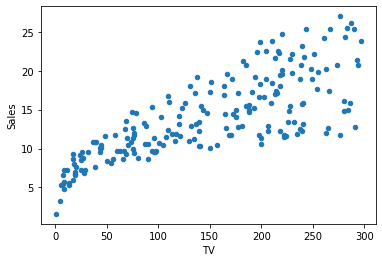

In [6]:
## Graficamos la variable TV como la x, y las ventas como la y:
data_ads.plot(kind = "scatter",
              x = "TV",
              y = "Sales")

Otra forma es realizar una matriz de correlaciones entre todas las variables, y buscar en ellas de forma gráfica, cuales presentan alguna relación de dependencia. Como se puede ver en el siguiente gráfico, TV y Radio son las que presentan una correlación más acusada frente a las ventas:

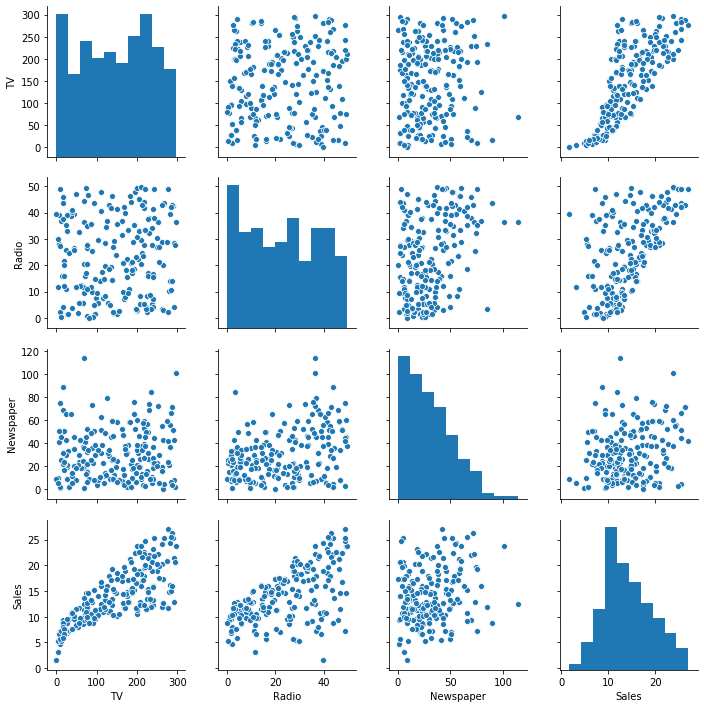

In [26]:
sns.pairplot(data_ads)
plt.show()

Analíticamente, también se puede obtener un valor del grado de correlación entre variables mediante la $r$ de Pearson. Python permite obtener este valor de forma sencilla mediante la función `df.corr()`. Como se puede ver en la siguiente tabla, el grado de correlación más alto se da para la combinación de variables TV-Sales, en segundo lugar Radio-Sales.

In [4]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


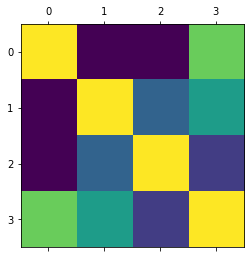

In [5]:
plt.matshow(data_ads.corr())

**Cálculo de los coeficientes:**

El próximo paso es definir el modelo de predicción averiguando los valores de los coeficientes $\alpha$ y $\beta$:

\begin{equation*}
\hat{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}\qquad
\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}
\end{equation*}

In [23]:
## Nos quedamos solo con las columnas de TV (x) y Sales (y):
df_ads_tv = data_ads[['TV', 'Sales']]

## Creamos las columnas auxiliares necesarias:
df_ads_tv['TV_mean'] = df_ads_tv['TV'].mean()
df_ads_tv['Sales_mean'] = df_ads_tv['Sales'].mean()

## Calculamos los coeficientes alfa y beta:
numerador = sum((df_ads_tv['TV'] - df_ads_tv['TV_mean'])*(df_ads_tv['Sales'] - df_ads_tv['Sales_mean']))
denominador = sum((df_ads_tv['TV'] - df_ads_tv['TV_mean'])**2)

beta = numerador / denominador
alfa = df_ads_tv['Sales'].mean() - beta * df_ads_tv['TV'].mean()

## Imprimimos el valor de los coeficientes:
print("Los coeficientes alfa y beta son:", alfa, beta)

C:\Users\gmachin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Los coeficientes alfa y beta son: 7.032593549127705 0.04753664043301969


Una vez estimados los coeficientes de la recta de regresión, se puede escribir la función predictora como:

\begin{equation*}
\hat{y} = 7.0326 + 0.0475 · x
\end{equation*}

Si pintamos esta recta de regresión junto a la nube de puntos anterior, veremos como se adapta a la forma de la nube:

In [41]:
## Añadimos una columna al dataset que sea el valor de y_pred
df_ads_tv['Sales_pred'] = 7.0326 + 0.0475 * df_ads_tv['TV']

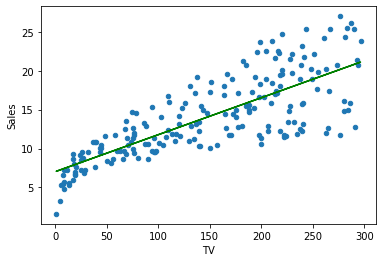

In [42]:
## Graficamos la variable TV como la x, y las ventas como la y:
df_ads_tv.plot(kind = "scatter", x = "TV", y = "Sales")

plt.plot(df_ads_tv["TV"], df_ads_tv["Sales_pred"], "g")

También podemos realizarlo más rápido a partir de la función `sns.regplot()` de la librería `seaborn`, la cual incluye una recta de regresión junto con un intervalo de confianza de 95%:

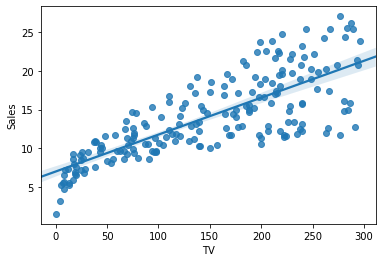

In [24]:
sns.regplot(x = "TV", y = "Sales", data = df_ads_tv)

**Análisis de la precisión de los coeficientes:**

El intervalo de confianza de los coeficiente $\hat{\alpha}$ y $\hat{\beta}$, se obtiene de las siguientes fórmulas:

\begin{equation*}
\Bigl( \hat{\alpha} - t·SE(\hat{\alpha}),\ \hat{\alpha} + t·SE(\hat{\alpha})  \Bigr)
\end{equation*}

\begin{equation*}
\Bigl( \hat{\beta} - t·SE(\hat{\beta}),\ \hat{\beta} + t·SE(\hat{\beta})  \Bigr)
\end{equation*}

Donde $t$ es la el estadístico t-student para n-2 grados de libertad y un grado de confianza definido. Se puede obtener en Python mediante la función `stat.t.isf(probabilidad, grados_libertad)` de la librería `SciPy`.

In [20]:
## Importamos el modulo stats de SciPy
from scipy import stats

## Obtenemos el t-estadístico para un valor del 97,5% (0.025 es 0.05/2, para tener en cuenta ambas colas)
stats.t.isf(0.025, len(data_ads)-2)

1.972017477833896

**Análisis de la precisión del modelo:**

Una vez se ha obtenido la ecuación del modelo de predicción de la variable dependiente, es momento de analizar como se adapta el modelo a la realidad del dataset, para ello se deben analizar los indicadores $RSE$ y $R^2$:

\begin{equation*}
RSE = \sigma = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum (y_i - \hat{y})^2}{n-2}}\qquad
R^2 = \frac{\sum(y_i - \bar{y})^2-\sum(y_i - \hat{y})^2}{\sum(y_i - \bar{y})^2} = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}
\end{equation*}

In [66]:
## Indicador RSE:
RSE = np.sqrt(sum((df_ads_tv['Sales']-df_ads_tv['Sales_pred'])**2)/(len(df_ads_tv)-2))
print('El error residual estándar es:', RSE)

El error residual estándar es: 3.258662382778687


El dato anterior indica que para cualquier predicción que hagamos de $\hat{y}_i$ en base a $x_i$, tendrá un error de 3.25 unidades.

Para valorar si el ajuste obtenido por la recta a la nube muestral de puntos es bueno, es conveniente utilizar el valor numérico del RSE en relación con alguna referencia, y la media muestral de la variable endógena es un buen indicador.

Esto permite presentar que porcentaje de los resultados es explicado por el modelo.

In [68]:
## Indicador RSE en relación a la variable dependiente:
RSE/df_ads_tv['Sales'].mean()

0.23238811786619265

De este análisis podemos deducir que aunque las ventas están muy ligadas a la televisión, y que indudablemente un aumento del gasto en este medio conllevará un aumento en las ventas, pero no explica al 100% el resultado en ventas, de hecho hay un 23% de las ventas que se quedan fuera de este análisis si solo tenemos en cuenta la TV.

Por lo que para afinar más este modelo, parece claro que habrá que incluír el resto de variables en el análisis para obtener el modelo mas ajustado a la realidad.

De cara a seguir obteniendo información de la bondad de ajuste del modelo, podemos calcular también el coeficiente de determinación $R^2$:

In [77]:
## Indicador R^2:
R2 = 1 - (sum((df_ads_tv['Sales']-df_ads_tv['Sales_pred'])**2)/sum((df_ads_tv['Sales']-df_ads_tv['Sales_mean'])**2))
print('El coeficiente de determinación R2 es:', R2)

El coeficiente de determinación R2 es: 0.6118736182133633


## 4. Regresión lineal - statsmodel

statsmodels es una librería de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos.

Este paquete permite obtener datos estadísticos y las bondades de ajuste de una regresión lineal, de una forma más cómoda que la manual, y también permite analizar que variables tienen más peso en el ajuste del modelo.

In [82]:
## Importamos librerias
import statsmodels.formula.api as smf

In [83]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


### 4.1. Regresión lineal simple - statsmodel

**Modelo de regresión lineal simple:**

Mediante la función `smf.ols(formula = 'column_1~column_2', data = df).fit()` de `statsmodel`, se puede obtener el modelo de regresión lineal de una variable dependiente frente a una independiente.

El parámetro `smf.ols()` indica que el ajuste del modelo será realizado mediante el método de los mínimos cuadrados (Ordinary Least Squares).

In [85]:
## ols = ordinary least squares
lm = smf.ols(formula = "Sales~TV", data = data_ads).fit()

**Cálculo de los coeficientes:**

Una vez se ha creado el modelo, se pueden obtener el intercepto y la pendiente de la recta de regresión mediante la función `.params`:

In [86]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Como hemos visto en temas anteriores, estos coeficientes son estimados, y por lo tanto debemos calcular su p-valor para ver si estos parámetros tienen significancia estadística. Marcamos como nivel de significancia válido 0.05.

Se pueden obtener los p-valores mediante la función `.pvalues`:

In [87]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

**Análisis de la precisión del modelo:**

Para calcular la bondad de ajuste del modelo a los puntos del dataset, podemos analizar el coeficiente de determinación $R^2$. Se puede obtener este indicador mediante la función `.rsquared`:

In [91]:
lm.rsquared

0.611875050850071

In [92]:
lm.rsquared_adj

0.6099148238341623

Por último se puede presentar un cuadro resumen de todos los indicadores y valores estadísticos del modelo mediante la función `.summary()`:

In [95]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.47e-42
Time:                        17:50:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Una vez se ha dado por bueno el modelo de predicción obtenido, también se pueden obtener las variables dependientes $\hat{y}_i$ a partir de las variables independientes $x_i$ mediante la función `lm.predict(pd.DataFrame(df['column']))`:

In [98]:
y_pred = lm.predict(pd.DataFrame(data_ads['TV']))
y_pred.head()

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

### 4.2. Regresión lineal múltiple - statsmodel

Hasta el momento solo hemos analizado las ventas en función de la inversión en publicidad mediante TV, pero como se ha visto en el análisis de algunos indicadores como el $RSE$, es posible que existan otras variables del dataset que permitan un ajuste mejor y expliquen mejor las ventas. Para ello, se va a realiza una regresión lineal múltiple incluyendo las variables Newspaper y Radio.

**Modelo de regresión múltiple:**

In [102]:
## Analizamos el modelo incluyendo como variables independientes en primer lugar TV y Radio, y en segundo lugar TV, Radio y Newspaper:
mult_lm_tv_rad = smf.ols(formula = "Sales~TV+Radio", data = data_ads).fit()
mult_lm_tv_rad_ns = smf.ols(formula = "Sales~TV+Radio+Newspaper", data = data_ads).fit()

**Análisis de la precisión del modelo:**

In [103]:
mult_lm_tv_rad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 09 May 2020   Prob (F-statistic):           4.83e-98
Time:                        18:24:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
mult_lm_tv_rad_ns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.58e-96
Time:                        18:24:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analizando los dos cuadros de resultados observamos que el $R^2$ es igual en ambos modelos de regresión. En caso de empate se suele optar por los modelos que menos variables dependientes tengan ya que son más sencillos e interpretables. Otra explicación para los casos en los que aumentando el número de variables se consigue una bondad de ajuste similar a la de modelos con menos entradas, puede deberse a la multicolienalidad**.

Adicionalmente si analizamos los intervalos de confianza y los p-valores, en el caso de la variable newspaper observamos que tiene un p-valor elevado, y que ademas el 0 está contenido en el intervalo, por lo que podríamos deshecharla del modelo.

## 5. Regresión lineal - scikit-learn

scikit-learn es una libreria de aprendizaje automático de software libre para el lenguaje de programación Python. Incluye algoritmos de clasificación, regresión y clustering.

Al igual que el paquete statsmodel, esta librería contiene ya funciones predefinidas que permiten realizar una regresión lineal de forma sencilla.

In [16]:
## Importamos librerias
from sklearn.linear_model import LinearRegression              ## Módulo para realizar regresiones lineales

In [110]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Modelo de regresión múltiple:**

Para fabricar el módelo de regresión mediante la libreria `scikit-learn` en primer lugar se debe crear un objeto de regresión lineal mediante la función `LinearRegression()`, para después entrenarlo con el dataset `.fit(inputs, outputs)`.

In [8]:
## Crear un objeto de regresión lineal, lo llamamo lm:
lm = LinearRegression()

## Entrenamiento del modelo mediante el dataset:
lm.fit(data_ads[['TV', 'Radio']], data_ads['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Cálculo de los coeficientes:**

Una vez se ha entrenado el modelo, se pueden extraer los coeficientes alfa y beta mediante las funciones `.intercept_` y `.coef_` respectivamente:

In [9]:
lm.intercept_

2.9210999124051362

In [10]:
lm.coef_

array([0.04575482, 0.18799423])

**Análisis de la precisión del modelo:**

Podemos obtener el indicador de determinación $R^2$ mediante la función `lm.score(inputs, outputs)`:

In [11]:
lm.score(data_ads[['TV', 'Radio']], data_ads['Sales'])

0.8971942610828956

Una vez se ha dado por bueno el modelo de predicción obtenido, también se pueden obtener las variables dependientes $\hat{y}_i$ a partir de las variables independientes $x_i$ mediante la función `lm.predict(df[['column_1', 'column_2', ...]])`:

In [13]:
# Relizar predicciones
y_pred = lm.predict(data_ads[['TV', 'Radio']])

## 6. Regresión lineal con variables categóricas

Hasta ahora, en todos los casos desarrollados, las variables predictoras eran numéricas o cuantitativas, pero se pueden encontrar datasets que tengan variables categóricas con un impacto importante en la variable a predecir.

Para solucionar este problema, lo que se suele hacer es crear variables dummies por cada variable categórica que se quiera incluir en el modelo predictor, e incluirlas en las ecuaciones de regresión.

Para llevar a cabo este ejercicio, cargamos otro dataset. Este fichero contiene información del número de transacciones, cantidad de gasto, y datos del individuo que lleva a cabo las transacciones; la variable a predecir será la columna Total Spend. Como se puede ver en el fichero existen columnas con variables categóricas como el género o el ranking de la ciudad a la que pertenecen.

In [28]:
## Cargamos el fichero de trabajo
mainpath = "C:/Users/gmachin/Desktop/Developer/apuntes-notebooks/datasets"
filename = "/ecom-expense/ecom-expense.csv"
fullpath = mainpath + filename

data_exp = pd.read_csv(fullpath)

data_exp.head(3)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455


Queremos incluir en el modelo predictivo el género y la ciudad de origen, por lo que tendremos que dumificarlas para convertirlas en un número y poder realizar una predicción incluyendo estos datos.

In [38]:
# Dumificamos el género y la ciudad
dummy_gender = pd.get_dummies(data_exp["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(data_exp["City Tier"], prefix = "City")

## Concatenamos estos datos en la tabla origen
data_exp_2 = pd.concat([data_exp, dummy_gender, dummy_city_tier], axis = 1)

## Definimos las variables independientes del modelo (X), y las dependientes (y)
cols = ["Monthly Income",
        "Transaction Time", 
        "Gender_Female",
        "Gender_Male", 
        "City_Tier 1",
        "City_Tier 2",
        "City_Tier 3",
        "Record"]

X = data_exp_2[cols]

y = data_exp_2[['Total Spend']]

Una vez tenemos el dataset dividido en variables dependientes e independientes, se puede comenzar con la modelización de la regresión. Para ello, nos apoyamos en la librería `scikit-learn`.

In [39]:
## Crear un objeto de regresión lineal, lo llamamo lm:
lm = LinearRegression()

## Entrenamiento del modelo mediante el dataset:
lm.fit(X, y)

## Obtenemos los coeficientes
print(lm.intercept_)
print(lm.coef_)

[-79.4171303]
[[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
   7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]]


>*Merece la pena indicar que si nos fijamos en los coeficientes de las variables que hemos dumificado y las sumamos, las de género por un lado, y la de distrito por otro, todas suman 0. Para evitar un número de coeficientes redundantes podemos eliminar de cada grupo de variables dumificadas una de ellas, ya que esta es inferible a partir de las restantes.*

## 7. Bibliografía

Este notebook esta basado en gran medida en el capítulo 3 del libro:

>*An Introductio to Statistical Learning with Applications in R.  
ISBN: 978-1-4614-7138-7.*